## Linear Regression - Predicting Student Scores from Study Hours

In this notebook, we'll use linear regression to model the relationship between hours studied and exam scores. We'll use `pandas` for data handling, `matplotlib` and `seaborn` for visualization, and `scikit-learn` for training the model.


### 🔧 Step 1: Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: Create a Sample Dataset

We'll simulate a dataset where students who study more tend to score higher. We'll also add some randomness to reflect real-world noise.

In [ ]:
# Set random seed for reproducible results
np.random.seed(42)

# Generate 100 random study hours between 1 and 10 hours
# reshape(-1, 1) converts from 1D array to 2D column vector (100 rows, 1 column)
hours = np.random.uniform(1, 10, 100).reshape(-1, 1)

# Create exam scores using linear relationship: y = 50 + 5x + noise
# Base score: 50 points
# Each study hour adds 5 points on average (5 * hours)
# Add random noise with mean=0, std=5 to make it realistic
# size=(100, 1) ensures noise array matches hours shape
scores = 50 + 5 * hours + np.random.normal(0, 5, size=(100, 1))  

# Convert numpy arrays to pandas DataFrame for easier data manipulation
# flatten() converts 2D arrays back to 1D for DataFrame columns
df = pd.DataFrame({
    'Hours_Studied': hours.flatten(),    
    'Exam_Score': scores.flatten()       
})

# Display first 5 rows
df.head()

### Step 3: Visualize the Relationship

We'll plot the data to visually inspect the linear relationship between hours studied and exam scores.

In [ ]:
# Create a new figure with specified dimensions (8 inches wide, 5 inches tall)
plt.figure(figsize=(8, 5))

# Create a scatter plot using seaborn for better styling
# x-axis: Hours_Studied column from our DataFrame
# y-axis: Exam_Score column from our DataFrame
# Each point represents one student's study hours and corresponding exam score
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')

# Add a descriptive title at the top of the plot
plt.title('Hours Studied vs Exam Score')

# Label the x-axis to clearly identify what the horizontal values represent
plt.xlabel('Hours Studied')

# Label the y-axis to clearly identify what the vertical values represent
plt.ylabel('Exam Score')

# Add a grid to make it easier to read approximate values from the plot
# Grid lines appear as light background lines
plt.grid(True)

# Display completed plot in the output
plt.show()

### Step 4: Split the Dataset

We'll split the data into training and testing sets using an 80-20 split.

In [ ]:
# Prepare features (independent variables) for machine learning
# Double brackets [['Hours_Studied']] keep it as DataFrame (2D structure)
# Single brackets ['Hours_Studied'] would create a Series (1D structure)
# ML algorithms typically expect 2D input for features
X = df[['Hours_Studied']]

# Prepare target variable (dependent variable) - what we want to predict
# Keep as DataFrame for consistency, though could be Series
# This is the exam score we're trying to predict based on study hours
y = df[['Exam_Score']]

# Split data into training and testing sets for model evaluation
# X_train, y_train: 80% of data used to train/teach the model
# X_test, y_test: 20% of data held back to test how well model performs on unseen data
# test_size=0.2 means 20% goes to testing, 80% to training
# random_state=42 ensures same split every time (reproducible results)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Train the Linear Regression Model

In [ ]:
# Create a linear regression model object
# This initializes the algorithm that will find the best-fit line
model = LinearRegression()

# Train the model using the training data
# fit() method calculates the optimal intercept and slope values
# It finds the line that minimizes the distance between actual and predicted values
model.fit(X_train, y_train)

# Display the intercept (y-intercept) - where the line crosses the y-axis
# This represents the predicted exam score when study hours = 0
# model.intercept_ is an array, so [0] gets the first (and only) value
print("Intercept:", model.intercept_[0])

# Display the slope (coefficient) - how much y changes for each unit increase in x
# This represents how many points the exam score increases per additional study hour
# model.coef_ is a 2D array, so [0][0] gets the coefficient for our single feature
print("Slope:", model.coef_[0][0])

### Step 6: Make Predictions on Test Data

In [ ]:
# Use the trained model to make predictions on the test set
# X_test contains study hours the model hasn't seen during training
# y_pred will contain the model's predicted exam scores for these hours
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted results
results = pd.DataFrame({
    # Extract study hours from test set
    # .values gets numpy array, .flatten() converts to 1D array
    'Hours_Studied': X_test.values.flatten(),
    
    # Extract actual exam scores from test set
    # These are the true scores we want to compare our predictions against
    'Actual_Score': y_test.values.flatten(),
    
    # Model's predicted exam scores for the test set
    # .flatten() ensures it's a 1D array to match other columns
    'Predicted_Score': y_pred.flatten()
})

# Display first 5 rows to see how well our predictions match reality
# This lets us visually assess model performance before calculating metrics
results.head()

### Step 7: Visualize the Regression Line

In [ ]:
# Create a new figure with specified dimensions for the comparison plot
plt.figure(figsize=(8, 5))

# Plot actual test scores as scattered points (blue dots by default)
# Each dot represents one student's actual exam performance
# x-axis: study hours, y-axis: actual exam scores
sns.scatterplot(x=X_test.values.flatten(), y=y_test.values.flatten(), label='Actual')

# Plot predicted scores as a red line
# This shows the model's prediction line based on the learned relationship
# The line represents: predicted_score = intercept + slope × study_hours
sns.lineplot(x=X_test.values.flatten(), y=y_pred.flatten(), color='red', label='Predicted')

# Label the x-axis to show what horizontal values represent
plt.xlabel('Hours Studied')

# Label the y-axis to show what vertical values represent
plt.ylabel('Exam Score')

# Add descriptive title explaining what the plot shows
plt.title('Actual vs Predicted Exam Scores')

# Add legend to distinguish between actual data points and prediction line
# Shows which color/symbol represents actual vs predicted values
plt.legend()

# Add grid lines to make it easier to read values from the plot
plt.grid(True)

# Display the completed visualization
plt.show()

### Step 8: Evaluate the Model

We'll use Mean Squared Error (MSE) and R-squared score (R²) to evaluate performance.

In [ ]:
# Calculate Mean Squared Error (MSE) - measures average prediction error
# MSE = average of (actual - predicted)² for all test samples
# Lower MSE = better model performance
# Units are squared (exam score points²), making it harder to interpret directly
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²) - measures how well the model explains variance in data
# R² = 1 - (sum of squared residuals / total sum of squares)
# Range: 0 to 1 (can be negative for very poor models)
# 1.0 = perfect predictions, 0.0 = model no better than predicting the mean
r2 = r2_score(y_test, y_pred)

# Display MSE rounded to 2 decimal places
# This shows the average squared difference between actual and predicted scores
print(f"Mean Squared Error: {mse:.2f}")

# Display R² rounded to 2 decimal places
# This shows what percentage of variance in exam scores is explained by study hours
# Example: 0.85 means 85% of score variation is explained by the model
print(f"R-squared Score: {r2:.2f}")

## Summary

- **Linear regression** fits a straight line to model relationships between variables.
- We trained the model to predict `Exam Score` from `Hours Studied`.
- The R² score tells us how well the model explains the variance in data (closer to 1 is better).
- You can now try predicting new values or testing on real-world data.

### Example 2: Find the Relationship between SAT Score and College GPA

In [ ]:
# Load Dataset
df = pd.read_csv('../datasets/sat-gpa.csv')

# Provide summary statistics for the dataset
# This includes count, mean, std deviation, min, max, and quartiles for each column
# Helps understand data distribution, detect outliers, and identify missing values
print(df.describe())

# Create a new figure with specified dimensions (8 inches wide, 5 inches tall)
plt.figure(figsize=(8, 5))

# Create a scatter plot using seaborn for better styling
sns.scatterplot(data=df, x='SAT', y='GPA')

# Add a descriptive title at the top of the plot
plt.title('SAT Scores vs GPA')

# Label the x-axis to clearly identify what the horizontal values represent
plt.xlabel('SAT Score')

# Label the y-axis to clearly identify what the vertical values represent
plt.ylabel('GPA')

# Add a grid to make it easier to read approximate values from the plot
plt.grid(True)

# Display completed plot in the output
plt.show()

# Prepare features (independent variables) for machine learning
X = df[['SAT']]

# Prepare target variable (dependent variable) - what we want to predict
y = df[['GPA']]

# Split data into training and testing sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model object
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Display the intercept (y-intercept) - where the line crosses the y-axis
print("Intercept:", model.intercept_[0])

# Display the slope (coefficient) - how much y changes for each unit increase in x
print("Slope:", model.coef_[0][0])

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted results
results = pd.DataFrame({
    'SAT': X_test.values.flatten(),
    'Actual_GPA': y_test.values.flatten(),
    'Predicted_GPA': y_pred.flatten()
})

# plot actual vs predicted results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test.values.flatten(), y=y_test.values.flatten(), label='Actual')
sns.lineplot(x=X_test.values.flatten(), y=y_pred.flatten(), color='red', label='Predicted')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.title('Actual vs Predicted GPA')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Mean Squared Error (MSE) - measures average prediction error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²) - measures how well the model explains variance in data
r2 = r2_score(y_test, y_pred)

# Display MSE rounded to 2 decimal places
print(f"Mean Squared Error: {mse:.2f}")
# Display R² rounded to 2 decimal places
print(f"R-squared Score: {r2:.2f}")



### Example 3: Predict Salary based on Years of Experience

In [ ]:
# Load dataset
df = pd.read_csv('../datasets/salary-data.csv')

# Split data into features and target variable
X = df[['YearsExperience']]
y = df[['Salary']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model object
model = LinearRegression()
# Train the model using the training data
model.fit(X_train, y_train)
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)  
# Calculate R-squared (R²) - measures how well the model explains variance in data
r2 = r2_score(y_test, y_pred)
# Display R² rounded to 2 decimal places
print(f"R-squared Score: {r2:.2f}")
# Create a DataFrame to compare actual vs predicted results
results = pd.DataFrame({
    'Actual_Salary': y_test.values.flatten(),
    'Predicted_Salary': y_pred.flatten()
})
print(results.head())
# Plot actual vs predicted results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten(), label='Predicted')
sns.lineplot(x=y_test.values.flatten(), y=y_test.values.flatten(), color='red', label='Actual')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()  

### Multiple Linear Regression: Predict Price of Used Cars based on different features

In [ ]:
# Load dataset
df = pd.read_csv('../datasets/used-cars.csv')

# Provide summary statistics for the dataset
print(df.describe(include='all'))

# Get column names and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
# Rule of thumb: if less than 5% of data is missing, it's usually safe to drop
df.dropna(inplace=True)

# Drop unnecessary columns
df.drop(columns=['Model'], inplace=True)

# Quantile method to remove outliers 
# Calculate lower and upper bounds for outliers
lower_bound = df['Price'].quantile(0.01)
upper_bound = df['Price'].quantile(0.99)
# Filter out outliers based on price
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Do the same for 'Mileage' column
upper_bound_mileage = df['Mileage'].quantile(0.99)
lower_bound_mileage = df['Mileage'].quantile(0.01)
df = df[(df['Mileage'] <= upper_bound_mileage) & (df['Mileage'] >= lower_bound_mileage)]

# Filter out first percentile of 'Year' column
lower_bound_year = df['Year'].quantile(0.01)
df = df[df['Year'] >= lower_bound_year]

# Filter out EngineV values less than 6.5
df = df[df['EngineV'] <= 6.5]

# Log transformation to reduce skewness
df['Price'] = np.log(df['Price'])

# Check OLS assumptions
# Create subplots for Price vs each feature
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()
# Scatter plot for Price vs Mileage
sns.scatterplot(x='Mileage', y='Price', data=df, ax=axes[0])
axes[0].set_title('Price vs Mileage')
# Scatter plot for Price vs Year
sns.scatterplot(x='Year', y='Price', data=df, ax=axes[1])
axes[1].set_title('Price vs Year')
# Scatter plot for Price vs EngineV
sns.scatterplot(x='EngineV', y='Price', data=df, ax=axes[2])
axes[2].set_title('Price vs EngineV')


# Check for multicollinearity
# Calculate correlation matrix between numeric features
numerical_features = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
# Display correlation matrix
print(correlation_matrix)
# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()  

# Use VIF to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_features.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
# Display VIF values
print(vif_data) 

# Drop 'Year' due to high VIF
df.drop(columns=['Year'], inplace=True)

# Create dummy variables for categorical features
df = pd.get_dummies(df, drop_first=True)

# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Prepare features and target variable
X = df.drop(columns=['Price'])
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a linear regression model object
model = LinearRegression()
# Train the model using the training data
model.fit(X_train, y_train)
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE) - measures average prediction error
mse = mean_squared_error(y_test, y_pred)
# Calculate R-squared (R²) - measures how well the model explains variance in data
r2 = r2_score(y_test, y_pred)
# Display MSE rounded to 2 decimal places
print(f"Mean Squared Error: {mse:.2f}")
# Display R² rounded to 2 decimal places
print(f"R-squared Score: {r2:.2f}")
# Create a DataFrame to compare actual vs predicted results
results = pd.DataFrame({
    'Actual_Price': y_test.values.flatten(),
    'Predicted_Price': y_pred.flatten()
})
# Plot actual vs predicted results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten(), label='Predicted')
sns.lineplot(x=y_test.values.flatten(), y=y_test.values.flatten(), color='red', label='Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.grid(True)
plt.show()      


### Regularization Techniques Compared
Example: Predict profit for startups based on different factors

Linear Regression R²: 0.8987
Lasso Regression R²: 0.8987
Ridge Regression R²: 0.8954

Coefficients Comparison:
  Feature      Linear         Lasso         Ridge
0      X1  938.793006    445.948279    331.521019
1      X2    6.987760      1.251844     69.197006
2      X3    0.805630  38102.800430  35978.030036
3      X4   -0.068788  -1863.964955  -1347.107288
4      X5    0.029855   3385.358670   4919.964571

Statsmodels OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           1.34e-27
Time:                        23:14:28   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residua

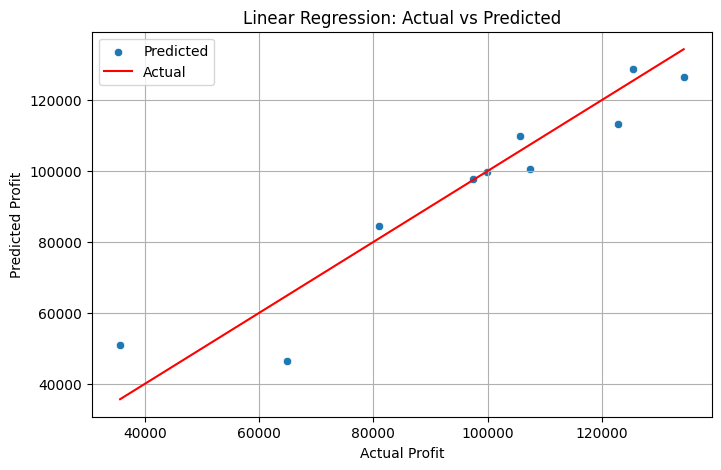

In [ ]:
# ===============================================
# 1. Import required libraries
# ===============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

import statsmodels.api as sm  # For statistical summary

# ===============================================
# 2. Load Dataset
# ===============================================
df = pd.read_csv('../datasets/startups-data.csv')

# Features = all columns except the last, Target = last column
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# ===============================================
# 3. Encode Categorical Variables (One-Hot Encoding)
# 'State' is categorical, so we apply OneHotEncoder to column index 3
# drop='first' avoids dummy variable trap
# ===============================================
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# ===============================================
# 4. Train-Test Split
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================================
# 5. Feature Scaling (Important for Lasso/Ridge)
# LinearRegression doesn't require scaling, but Lasso/Ridge do
# We'll keep scaled versions for those models
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================================
# 6. Linear Regression (Ordinary Least Squares)
# ===============================================
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Regression R²: {r2_lin:.4f}")

# ===============================================
# 7. Lasso Regression (L1 Regularization)
# L1 adds penalty to absolute values of coefficients -> some become zero (feature selection)
# alpha controls regularization strength
# ===============================================
lasso_model = Lasso(alpha=1.0)  # You can tune alpha using cross-validation
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression R²: {r2_lasso:.4f}")

# ===============================================
# 8. Ridge Regression (L2 Regularization)
# L2 adds penalty to squared coefficients -> prevents large weights (good for multicollinearity)
# ===============================================
ridge_model = Ridge(alpha=1.0)  # Tune alpha for better performance
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R²: {r2_ridge:.4f}")

# ===============================================
# 9. Compare Coefficients of all models
# ===============================================
print("\nCoefficients Comparison:")
coef_df = pd.DataFrame({
    'Feature': [f'X{i+1}' for i in range(X.shape[1])],
    'Linear': lin_model.coef_,
    'Lasso': lasso_model.coef_,
    'Ridge': ridge_model.coef_
})
print(coef_df)

# ===============================================
# 10. Statsmodels OLS for p-values and feature significance
# Adds a column of ones for the intercept (sm doesn't add it automatically)
# ===============================================
X_with_const = sm.add_constant(X)  # Add intercept
ols_model = sm.OLS(y, X_with_const).fit()
print("\nStatsmodels OLS Summary:")
print(ols_model.summary())

# ===============================================
# 11. Visualization: Actual vs Predicted (Linear)
# ===============================================
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred_lin.flatten(), label='Predicted')
sns.lineplot(x=y_test.values.flatten(), y=y_test.values.flatten(), color='red', label='Actual')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


### Linear vs Polynomial Regression
Example: Predict salary based on different levels

   Level  Actual Salary  Predicted Linear  Predicted Polynomial
0      1          45000    -114454.545455          53356.643357
1      2          50000     -33575.757576          31759.906760
2      3          60000      47303.030303          58642.191142
3      4          80000     128181.818182          94632.867133
4      5         110000     209060.606061         121724.941725

Metrics Comparison:
        Model           MSE        R²
0      Linear  2.669588e+10  0.669041
1  Polynomial  2.103438e+08  0.997392


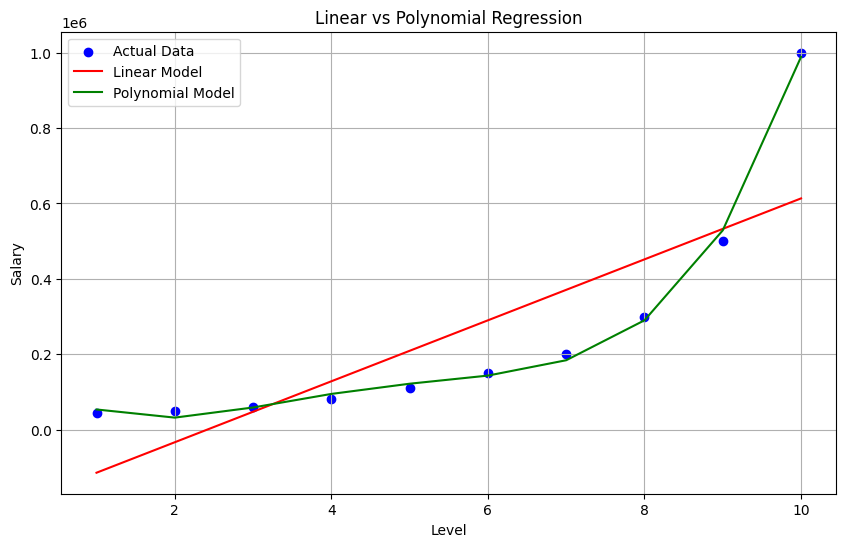

In [14]:
df = pd.read_csv('../datasets/position-salaries.csv')

# Prepare features and target variable
X = df[['Level']].values  
y = df['Salary'].values  

# Create a linear regression model
model = LinearRegression()
# Train the model
model.fit(X, y)

# Create a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)  # Degree can be adjusted
X_poly = poly.fit_transform(X)  # Transform features to polynomial features
poly_model = LinearRegression()
# Train the polynomial model
poly_model.fit(X_poly, y)

# Predict using both models
y_pred_linear = model.predict(X)
y_pred_poly = poly_model.predict(X_poly)

# Calculate metrics for both models
from sklearn.metrics import mean_squared_error, r2_score
mse_linear = mean_squared_error(y, y_pred_linear)
mse_poly = mean_squared_error(y, y_pred_poly)
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

# Create a dataframe to compare both models
comparison_df = pd.DataFrame({
    'Level': X.flatten(),
    'Actual Salary': y,
    'Predicted Linear': y_pred_linear,
    'Predicted Polynomial': y_pred_poly
})

# Display the comparison dataframe
print(comparison_df.head())

# Compare metrics
metrics_df = pd.DataFrame({
    'Model': ['Linear', 'Polynomial'],
    'MSE': [mse_linear, mse_poly],
    'R²': [r2_linear, r2_poly]
})
print("\nMetrics Comparison:")
print(metrics_df)

# Plot Linear Regression Model 
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Model')
plt.plot(X, y_pred_poly, color='green', label='Polynomial Model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

